<a href="https://colab.research.google.com/github/indhu68/ReinforcementLearning/blob/main/RL_Hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

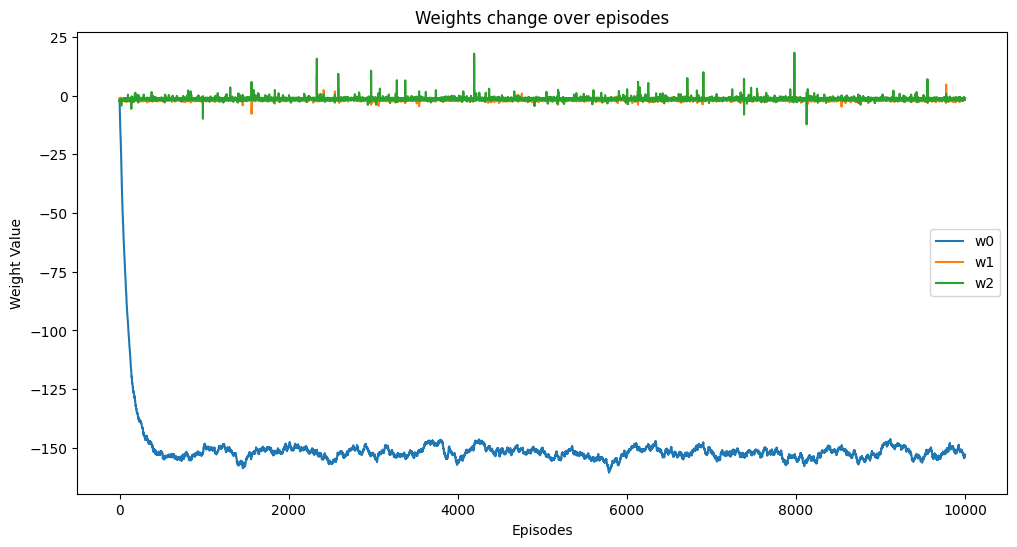

array([-152.92169652,   -1.58700859,   -1.17631441])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
gamma = 0.99  # discount factor
alpha = 0.01  # stepsize
num_episodes = 10000  # number of episodes to run
max_steps = 100  # maximum number of steps per episode
initial_weights = np.array([0.0, 0.0, 0.0])  # initial weights for the value function approximation

# Seed for reproducibility
np.random.seed(32)

# The policy to be evaluated
def policy(s):
    return -s / 2

# The system dynamics
def system_dynamics(s, a):
    w = np.random.normal(0, 1)  # Gaussian noise with mean 0 and variance 1
    return s + a + w

# The reward function
def reward(s, a):
    return -s**2 - a**2 - s

# The value function approximation
def v_hat(s, weights):
    return weights[0] + weights[1] * s + weights[2] * s**2

# Initialize the histories for each weight
w0_history = []
w1_history = []
w2_history = []

# The semi-gradient TD(0) learning algorithm
weights = initial_weights.copy()
for episode in range(num_episodes):
    s = np.random.normal(0, 1)

    for step in range(max_steps):
        # Policy execution
        a = policy(s)
        # Simulating the system dynamics
        next_s = system_dynamics(s, a)
        # Instantaneous reward
        r = reward(s, a)
        # Temporal difference target
        target = r + gamma * v_hat(next_s, weights)
        # Temporal difference error
        delta = target - v_hat(s, weights)
        # Gradient of v_hat is simply [1, s, s**2]
        grad_v_hat = np.array([1, s, s**2])
        # Semi-gradient update
        weights += alpha * delta * grad_v_hat
        s = next_s

    # Update histories
    w0_history.append(weights[0])
    w1_history.append(weights[1])
    w2_history.append(weights[2])

# Plotting the weight changes over episodes
plt.figure(figsize=(12, 6))
plt.plot(w0_history, label='w0')
plt.plot(w1_history, label='w1')
plt.plot(w2_history, label='w2')
plt.xlabel('Episodes')
plt.ylabel('Weight Value')
plt.title('Weights change over episodes')
plt.legend()
plt.show()

# Reporting the final weights separately
final_weights = np.array([w0_history[-1], w1_history[-1], w2_history[-1]])
final_weights
